In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Step 1: Sample dataset (10 samples,3 features)
data=np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2]

])

In [ ]:
data

array([[2.5, 2.4, 1.2],
       [0.5, 0.7, 0.3],
       [2.2, 2.9, 1.4],
       [1.9, 2.2, 1.1],
       [3.1, 3. , 1.7],
       [2.3, 2.7, 1.5],
       [2. , 1.6, 0.9],
       [1. , 1.1, 0.4],
       [1.5, 1.6, 0.8],
       [1.1, 0.9, 0.2]])

In [ ]:
df=pd.DataFrame(data,columns=["X","Y","Z"])

In [ ]:
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [ ]:
#Step 2: Standardization using pandas (avoid NaN issues)
standardized_data=(df-df.mean())/df.std()

In [ ]:
#Step 3: Covariance matrix
cov_matrix=np.cov(standardized_data.T)

In [ ]:
#Step 4: Eigen decomposition
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

In [ ]:
#Step 5: Sort eigen values and eigenvalues
sorted_indices=np.argsort(eig_vals)[::-1]
sorted_eig_vals=eig_vals[sorted_indices]
sorted_eig_vecs=eig_vecs[:,sorted_indices]

In [ ]:
#Step 6: Select top 2 eigen vectors
eig_vecs_subset=eig_vecs[:,:2]

In [ ]:
#Step 7:
reduced_data=standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df=pd.DataFrame(reduced_data,columns=["PC1","PC2"])
display(reduced_df)

,PC1,PC2
0,1.114772,0.287461
1,-2.502976,-0.278755
2,1.461615,-0.429478
3,0.430754,-0.162708
4,2.517452,0.260130
5,1.508478,-0.278933
6,-0.129861,0.401224
7,-1.754639,-0.043244
8,-0.604269,-0.055335
9,-2.041325,0.299640


In [ ]:
#Step 8: Output the reduced data
print("\nReduced Data (after PCA): \n",reduced_df)


Reduced Data (after PCA): 
         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640


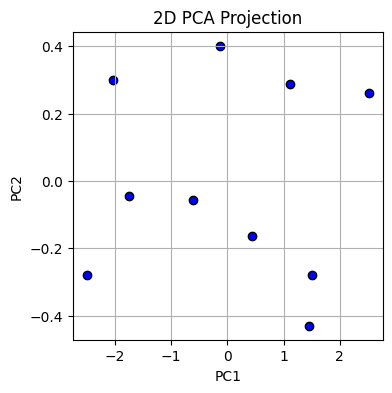

In [ ]:
# Step 9: Visualize
plt.figure(figsize=(4,4))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'],color='blue',edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()